In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from google.colab import files
from imblearn.over_sampling import SMOTE
from collections import Counter

# Reading the file
df = pd.read_csv('/content/RAC_train.csv')

# Specifying the features (x) and the target variable (y).
x = df[['temperature','time','solvent1','solvent2','solvent3','additive','param1','param2','param3','param4','param5']]  # Features: all columns except the target column
y = df['additive_category']


# Splitting the data into training and testing sets.
# 30% of the data is being taken for testing and 70% for training.
# random_state=42 ensures that the split is reproducible (same split every time).

# Split data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

# Printing the shape of the split
print("x_train shape:", x_train.shape)
print("x_test shape:", x_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)



x_train shape: (375, 11)
x_test shape: (162, 11)
y_train shape: (375,)
y_test shape: (162,)


In [ ]:
from sklearn.preprocessing import StandardScaler

# Performing standardization of the data to ensure consistency
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

print(x_train_scaled.shape)

(375, 11)


In [ ]:
!pip install scikit-learn-extra

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 21.4 MB/s eta 0:00:00


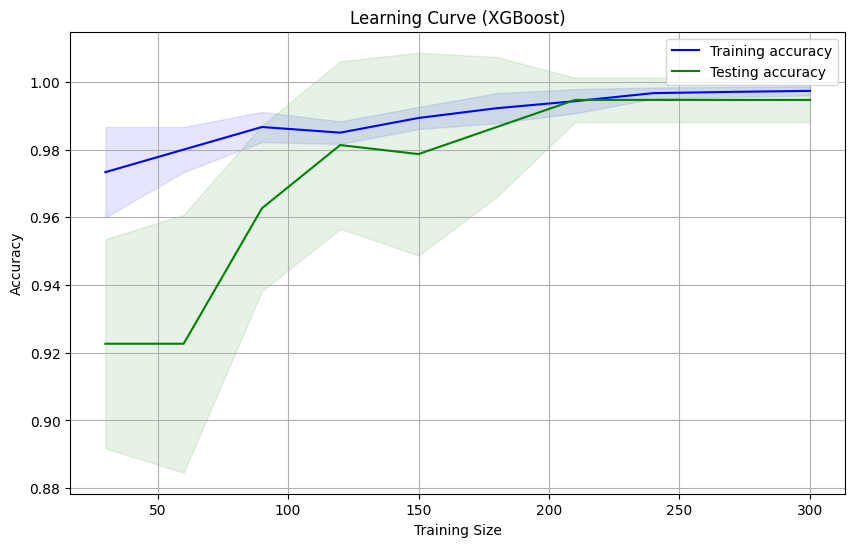

Final testing Accuracy :  0.9814814814814815


In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import learning_curve
import xgboost as xgb
from sklearn.metrics import accuracy_score

# Initializing XGBoost model with depth of the tree and learning rate
model = xgb.XGBClassifier(objective='multi:softmax', num_class=len(y_train.unique()),
                          n_estimators=5, max_depth=10, learning_rate=0.1, random_state=42)

# Computing the learning curve
train_sizes, train_scores, test_scores = learning_curve(
    model, x_train_scaled, y_train, cv=5,
    train_sizes=np.linspace(0.1, 1.0, 10), scoring='accuracy', n_jobs=-1)

# Calculating the mean and standard deviation for training and testing scores
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

# Plotting the learning curve
plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_mean, label='Training accuracy', color='blue')
plt.plot(train_sizes, test_mean, label='Testing accuracy', color='green')

# Plotting the standard deviation bands
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.1, color='blue')
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, alpha=0.1, color='green')

# Labels and title
plt.title('Learning Curve (XGBoost)')
plt.xlabel('Training Size')
plt.ylabel('Accuracy')
plt.legend(loc='best')
plt.grid(True)
plt.show()


# Testing the model accuracy
model.fit(x_train_scaled,y_train)
y_pred = model.predict(x_test_scaled)
print("Final testing Accuracy : ", accuracy_score(y_test, y_pred))

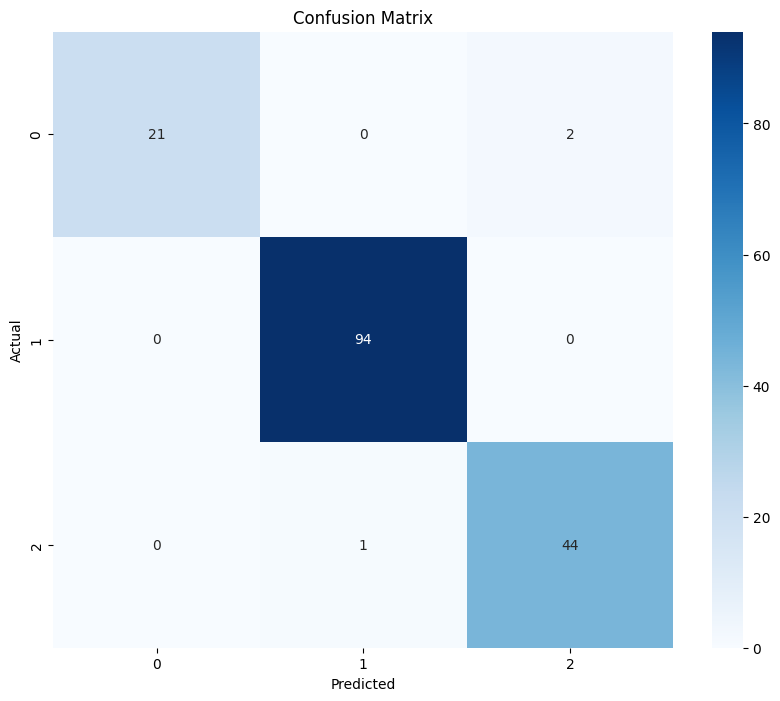

In [ ]:
# prompt: Generate data to check the accuracy of the model using confusion matrix

from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Generate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix using a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=list(set(y_test)), yticklabels=list(set(y_test)))
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


---
The results indicate unusually high accuracy.

This may stem from dataset quality, but overfitting is a likely factor.

Further testing and validation are required.

---
